<a href="https://colab.research.google.com/github/FGalvao77/Aplicacao-do-autoencoder-no-MNIST-dataset/blob/main/Aplica%C3%A7%C3%A3o_do_autoencoder_no_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aplicação do _autoencoder_ no `MNIST dataset`**

---



In [1]:
from keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

> Na atividade, usaremos somente os dados de **X**, nesse caso:  `X_train` e `X_test`.

In [3]:
print(
    f'X_train: {X_train.shape}',
    f' | X_test: {X_test.shape}'
)

X_train: (60000, 28, 28)  | X_test: (10000, 28, 28)


In [4]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Dígito: 9



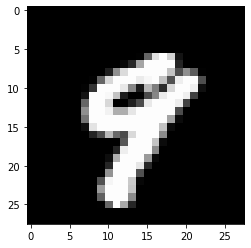

In [5]:
i = np.random.choice(range(len(X_train)))
plt.imshow(X_train[i], cmap='gray')

print(f'Dígito: {y_train[i]}\n')

In [6]:
X_train = X_train.reshape(60_000,28,28,1)
X_test = X_test.reshape(10_000,28,28,1)

In [16]:
import keras
import tensorflow as tf

from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Dropout, Flatten, Reshape
from keras.models import Sequential

In [9]:
model = Sequential()

model.add(Input(shape=(28,28,1)))
model.add(Conv2D(64,kernel_size=3, activation='relu'))
model.add(MaxPooling2D(padding='same'))

model.add(Conv2D(32,kernel_size=3, activation='relu'))
model.add(Conv2D(16,kernel_size=4, activation='relu'))
# model.add(Conv2D(16,kernel_size=3, activation='relu'))
model.add(MaxPooling2D(padding='same'))

# model.add(UpSampling2D())
model.add(Conv2D(16,kernel_size=4, activation='relu'))
model.add(MaxPooling2D(padding='same'))
model.add(Dense(1, activation='softmax'))

model.add(UpSampling2D(size=(14,14)))
# model.add(Conv2D(16,kernel_size=3, activation='relu'))
model.add(UpSampling2D(size=(2,2)))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 16)          8208      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 1, 1, 16)          4

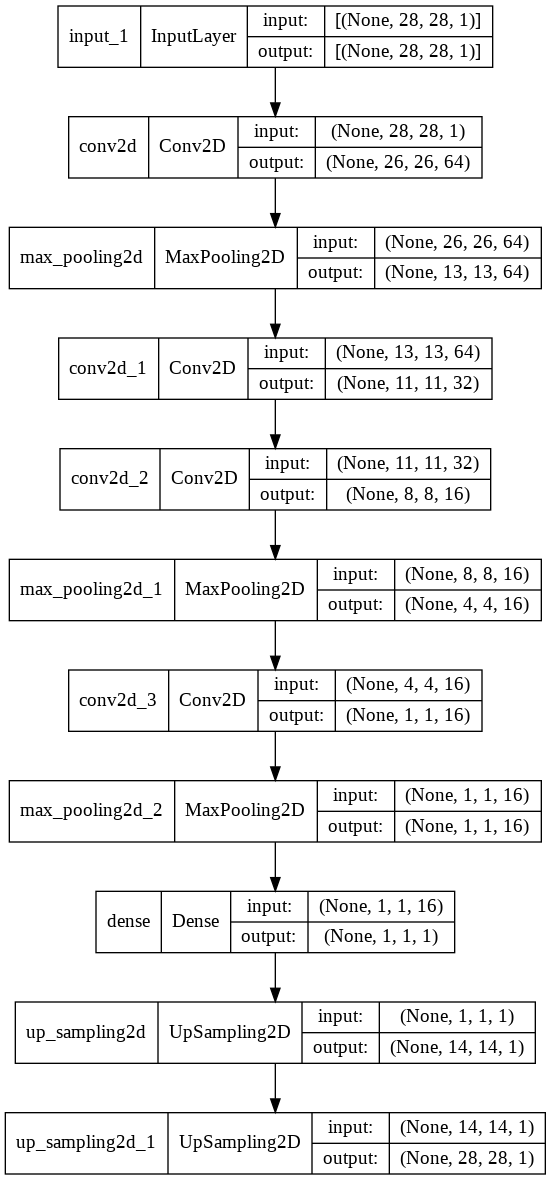

In [23]:
# visualizando graficamente a estrutura da rede neural criada
tf.keras.utils.plot_model(model, show_shapes=True)

In [11]:
model.compile(optimizer='rmsprop', loss='mse')

In [20]:
# instanciando o callbacks com early stopping
stopper = tf.keras.callbacks.EarlyStopping(
   monitor ='val_loss', patience=5, verbose=2
)

In [21]:
# visualizando se o ambiente de execução está operando em GPU
tf.config.list_physical_devices('GPU')

[]

In [22]:
model.fit(x=X_train, y=X_train, batch_size=60, epochs=10, validation_data=(X_test, X_test), callbacks=[stopper])

Epoch 1/10
1000/1000 [==============================] - 60s 60ms/step - loss: 7217.3252 - val_loss: 7343.5415
Epoch 2/10
1000/1000 [==============================] - 60s 60ms/step - loss: 7217.3296 - val_loss: 7343.5415
Epoch 3/10
1000/1000 [==============================] - 60s 60ms/step - loss: 7217.3252 - val_loss: 7343.5415
Epoch 4/10
1000/1000 [==============================] - 60s 60ms/step - loss: 7217.3286 - val_loss: 7343.5415
Epoch 5/10
1000/1000 [==============================] - 60s 60ms/step - loss: 7217.3281 - val_loss: 7343.5415
Epoch 6/10
1000/1000 [==============================] - 60s 60ms/step - loss: 7217.3252 - val_loss: 7343.5415
Epoch 00006: early stopping


In [24]:
pred_X_train = model.predict(X_train)
pred_X_test = model.predict(X_test)

Dígito: 6




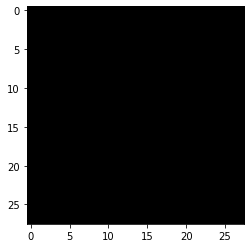

In [25]:
i = np.random.choice(range(len(X_train)))

plt.imshow(pred_X_train[i].reshape(28,28), cmap='gray')
print(f'Dígito: {y_train[i]}\n\n')

In [26]:
model = Sequential()

model.add(Input(shape=(28,28,1)))
model.add(Conv2D(64,kernel_size=3, activation='relu'))
model.add(MaxPooling2D(padding='same'))

model.add(Conv2D(32,kernel_size=3, activation='relu'))
model.add(Conv2D(16,kernel_size=4, activation='relu'))
model.add(Conv2D(16,kernel_size=4, activation='relu'))
model.add(MaxPooling2D(padding='same'))

# model.add(UpSampling2D())
# model.add(Conv2D(16,kernel_size=4, activation='relu'))
# model.add(MaxPooling2D(padding='same'))
# model.add(Dense(1, activation='softmax'))

model.add(UpSampling2D(size=(3,3)))
# model.add(UpSampling2D(size=(14,14)))
# model.add(Conv2D(16,kernel_size=3, activation='relu'))
model.add(UpSampling2D(size=(3,3)))
model.add(Flatten())
model.add(Dense(784, activation='softmax'))
model.add(Reshape(target_shape=(28,28,1)))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 16)          8208      
                                                                 
 conv2d_7 (Conv2D)           (None, 5, 5, 16)          4112      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 3, 3, 16)         0         
 2D)                                                  

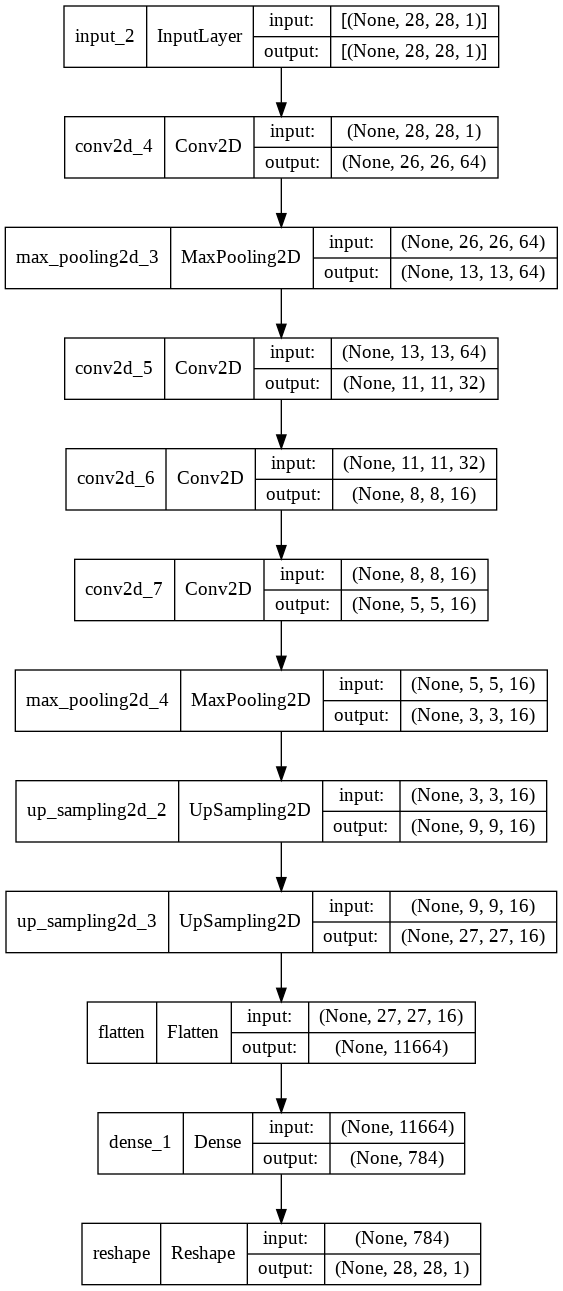

In [28]:
# visualizando graficamente a estrutura da rede neural criada
tf.keras.utils.plot_model(model, show_shapes=True)

In [29]:
model.compile(optimizer='rmsprop', loss='mse')

In [30]:
model.fit(x=X_train, y=X_train, batch_size=60, epochs=10, validation_data=(X_test, X_test), callbacks=[stopper])

Epoch 1/10
1000/1000 [==============================] - 136s 135ms/step - loss: 7282.7388 - val_loss: 7409.8950
Epoch 2/10
1000/1000 [==============================] - 135s 135ms/step - loss: 7282.7324 - val_loss: 7409.8950
Epoch 3/10
1000/1000 [==============================] - 135s 135ms/step - loss: 7282.7407 - val_loss: 7409.8950
Epoch 4/10
1000/1000 [==============================] - 134s 134ms/step - loss: 7282.7393 - val_loss: 7409.8950
Epoch 5/10
1000/1000 [==============================] - 135s 135ms/step - loss: 7282.7334 - val_loss: 7409.8950
Epoch 6/10
1000/1000 [==============================] - 135s 135ms/step - loss: 7282.7397 - val_loss: 7409.8950
Epoch 00006: early stopping


In [31]:
model.save('autoencoder.h5')

In [32]:
pred_X_train = model.predict(X_train)
pred_X_test = model.predict(X_test)

Dígito: 5




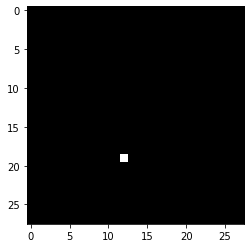

In [33]:
i = np.random.choice(range(len(X_train)))

plt.imshow(pred_X_train[i].reshape(28,28), cmap='gray')
print(f'Dígito: {y_train[i]}\n\n')

Dígito: 5




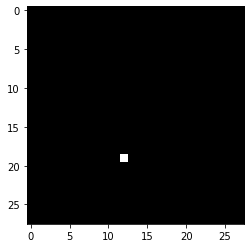

In [34]:
plt.imshow(pred_X_train[i].reshape(28,28), cmap='gray')
print(f'Dígito: {y_train[i]}\n\n')